<a href="https://colab.research.google.com/github/Techwithpraisejames/decision-trees-with-python/blob/main/Decision_tree_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #Splits the dataset into training and test sets.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Evaluates the model's accuracy
from sklearn.preprocessing import LabelEncoder #Converts categorical labels into numeric labels
from sklearn.tree import plot_tree #Visualizes the trained decision tree

In [15]:
csv_file_path = "/content/drug200.csv" #specify the file path
drug_prediction = pd.read_csv(csv_file_path) # Read the CSV file into a DataFrame
drug_prediction.head() # Display the first five rows of the DataFrame

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [16]:
drug_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [17]:
# Create a copy to preserve the original dataset
data = drug_prediction.copy()

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical features and target variable
data['Sex'] = encoder.fit_transform(data['Sex'])
data['BP'] = encoder.fit_transform(data['BP'])
data['Cholesterol'] = encoder.fit_transform(data['Cholesterol'])
data['Drug'] = encoder.fit_transform(data['Drug'])

In [18]:
# Define the features and target variables.

X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data[['Drug']]

X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [19]:
y.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [20]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [22]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Make predictions on the test set.

y_pred = decision_tree.predict(X_test)
print(y_pred)

[3 4 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 3 4 2 2 4 0 4 3
 0 4 0]


In [24]:
# calculate model accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



The classification report provides a detailed breakdown of the model's performance for each drug class. Here's what each metric means in this context:

*   **Precision:** For each drug class, precision tells you how many of the predicted drugs for that class were actually correct. A high precision means a low false positive rate.
*   **Recall:** For each drug class, recall tells you how many of the actual drugs of that class were correctly identified by the model. A high recall means a low false negative rate.
*   **F1-score:** This is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. A high F1-score indicates a good balance between these two metrics.
*   **Support:** This is the number of actual occurrences of each drug class in the `y_test` dataset.

In this case, the model achieved perfect scores (1.00 for precision, recall, and f1-score) for all drug classes. This means that the Decision Tree Classifier was able to perfectly predict the drug type for all 40 instances in the test set.

Take note that While this is excellent for this specific dataset, in real-world scenarios, it's common to see less than perfect scores, and a perfect score can sometimes indicate potential overfitting or a very easily separable dataset.

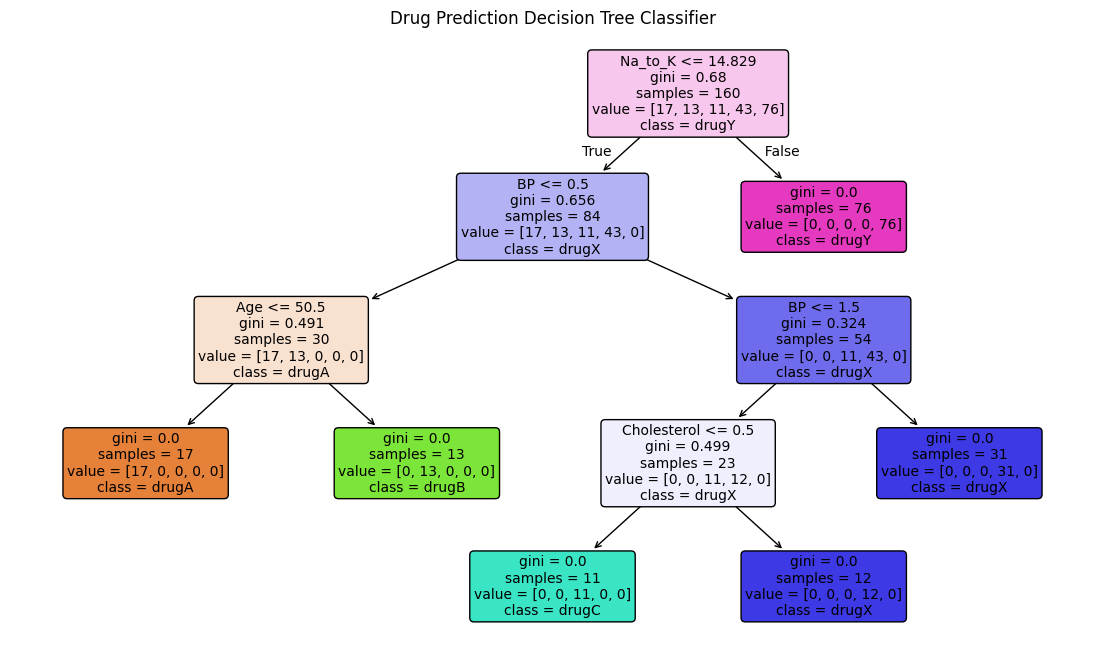

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Drug Prediction Decision Tree Classifier")
plt.show()